Average Augmentation

Saving x_payload_test.npy to x_payload_test (3).npy
Saving x_payload_train.npy to x_payload_train (3).npy
Saving x_payload_valid.npy to x_payload_valid (3).npy
Saving y_test.npy to y_test (3).npy
Saving y_train.npy to y_train (3).npy
Saving y_valid.npy to y_valid (3).npy
Training shapes: (77692,) (77692,)
Testing shapes: (9711,) (9711,)
Validation shapes: (9712,) (9712,)
X_train data type: <class 'numpy.ndarray'>
X_train first element: e742 421d 1dc8 c868 685e 5e90 90a9 a9d8 d891 9180 8010 1021 21f0 f060 60a9 a900 0000 0001 0101 0108 080a 0a1d 1d1e 1e0a 0a7c 7c0b 0b42 4231 31db db2f 2fd9 d975 754d 4de1 e180 802c 2cd2 d22e 2e77 771c 1c60 6002 020f 0f5a 5ac5 c5bd bdb0 b07b 7bab abf8 f82e 2e9b 9b5a 5a09 09a8 a848 48c1 c1ee ee11 1186 86d4 d442 42dd ddc0

Shapes after processing:
X_train_numeric shape: (77692, 64)
X_train_scaled shape: (77692, 64)
X_avg shape: (200, 64)
X_all shape: (77892, 64)
y_all shape: (77892, 20)
X_train sample: e742 421d 1dc8 c868 685e 5e90 90a9 a9d8 d891 9180 8010 1

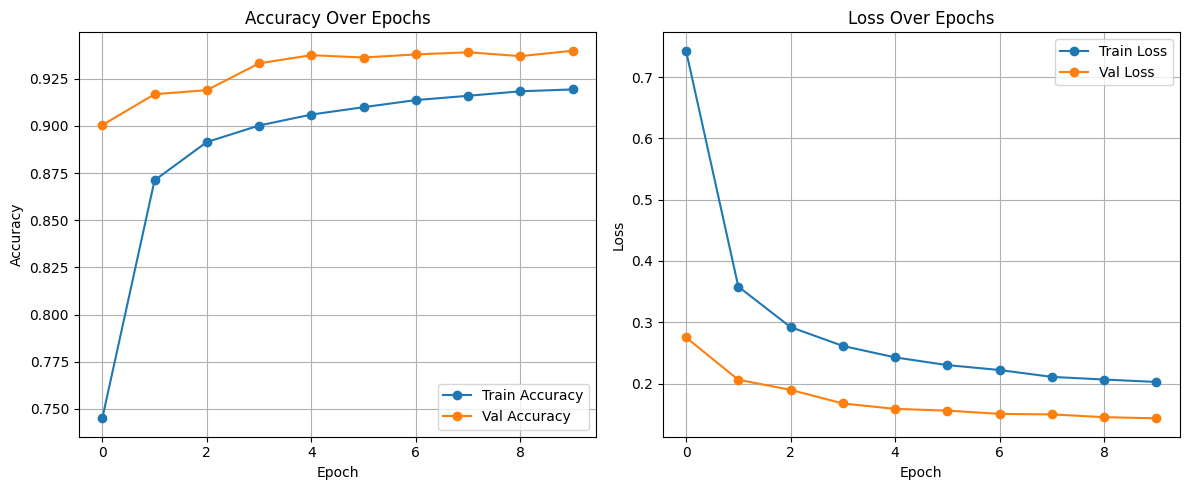


🔍 Test Metrics:
loss: 0.1452
compile_metrics: 0.9404
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

🧾 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       0.94      0.91      0.93       500
           5       0.99      1.00      1.00       500
           6       0.78      0.84      0.81       500
           7       0.96      1.00      0.98       500
           8       1.00      1.00      1.00       500
           9       0.64      0.63      0.64       500
          10       1.00      0.94      0.97       500
          11       1.00      0.99      0.99       500
          12       0.79      0.90      0.84       211
          13       0.99      1.00      1.00       500
          14       1.00      1.00      1.00       500
          15 

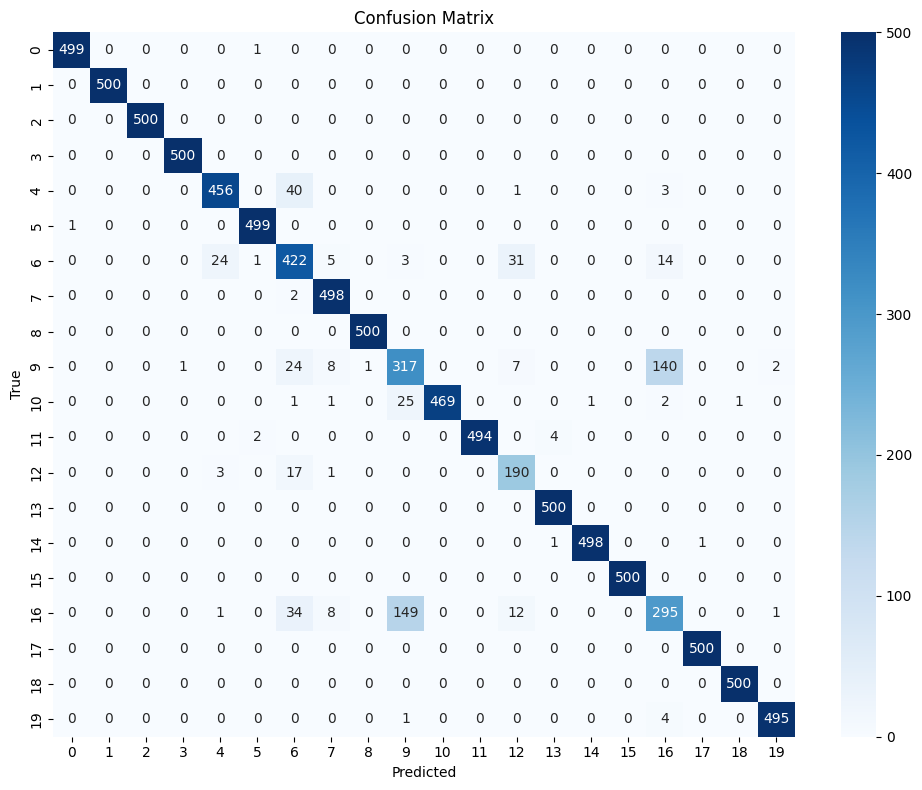

2435/2435 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


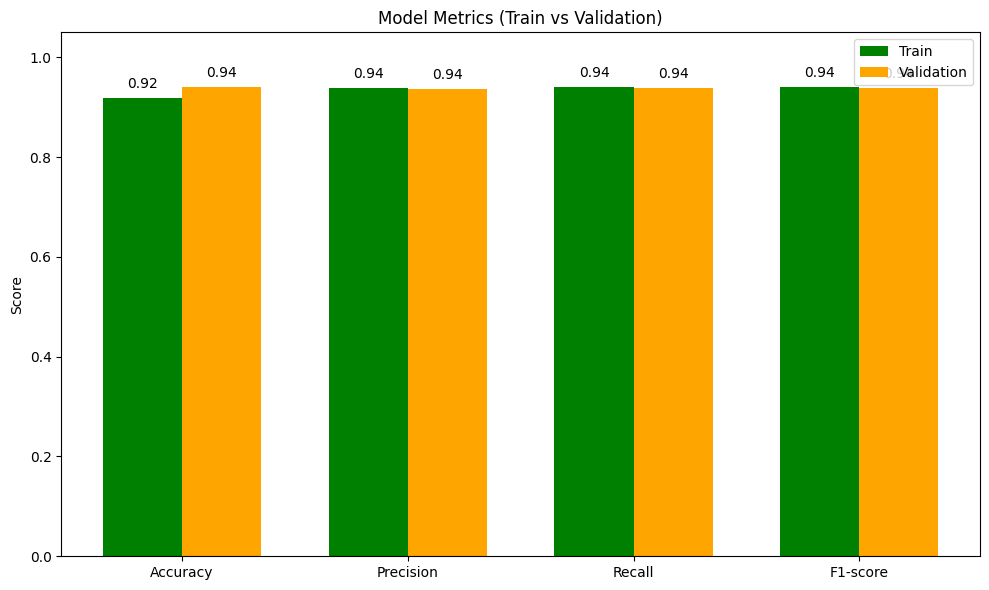

In [ ]:
# First import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the numpy files
uploaded = files.upload()  # Choose all 6 .npy files

# Print shapes to understand our data
print("Training shapes:", X_train.shape, y_train.shape)
print("Testing shapes:", X_test.shape, y_test.shape)
print("Validation shapes:", X_valid.shape, y_valid.shape)

# Step 2

# First, let's examine the data type and content
print("X_train data type:", type(X_train))
print("X_train first element:", X_train[0])

# Convert hex string data to numeric values
def hex_to_decimal(hex_string):
    # Split the string into pairs of hex values and convert each to decimal
    # Pad with zeros to ensure consistent length
    hex_values = hex_string.split()
    max_len = 64 # Replace with the desired or maximum length
    hex_values = hex_values + ['00'] * (max_len - len(hex_values)) #pad with '00'
    return np.array([int(x, 16) for x in hex_values])

# Convert the string data to numeric arrays
X_train_numeric = np.array([hex_to_decimal(x) for x in X_train])
X_test_numeric = np.array([hex_to_decimal(x) for x in X_test])
X_valid_numeric = np.array([hex_to_decimal(x) for x in X_valid])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes=num_classes)

# Define Average Augmentation Method
def average_augmentation(X, y, num_samples=200, pairs_per_sample=1):
    aug_X = []
    aug_y = []
    np.random.seed(42)
    indices = np.random.choice(len(X), size=num_samples, replace=False)
    for idx in indices:
        for _ in range(pairs_per_sample):
            j = np.random.choice(len(X))
            avg_sample = (X[idx] + X[j]) / 2
            aug_X.append(avg_sample)
            aug_y.append(y[idx])
    return np.array(aug_X), np.array(aug_y)

# Apply Average Augmentation
X_avg, y_avg = average_augmentation(X_train_scaled, y_train_cat)

# Merge Original + Augmented Data
X_all = np.vstack([X_train_scaled, X_avg])
y_all = np.vstack([y_train_cat, y_avg])

print("\nShapes after processing:")
print("X_train_numeric shape:", X_train_numeric.shape)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_avg shape:", X_avg.shape)
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)

#Step 3

# Let's examine the data type and content
print("X_train sample:", X_train[0])
print("y_train sample:", y_train[0])
print("\nX_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

#Step 4

# Convert hex string to numerical features
def hex_to_features(hex_string):
    # Split the string into pairs of hex characters and convert to integers
    hex_pairs = hex_string.split()
    # Pad with zeros to ensure consistent length
    max_len = 64 # Replace with the desired or maximum length
    hex_pairs = hex_pairs + ['00'] * (max_len - len(hex_pairs)) #pad with '00'
    return np.array([int(x, 16) for x in hex_pairs])

# Convert the data
X_train_numeric = np.array([hex_to_features(x) for x in X_train])
X_test_numeric = np.array([hex_to_features(x) for x in X_test])
X_valid_numeric = np.array([hex_to_features(x) for x in X_valid])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes)

print("After preprocessing:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("Number of classes:", num_classes)

#Step 5

# Let's check the length of hex strings to ensure they're consistent
lengths = [len(x.split()) for x in X_train]
print("Unique lengths in training data:", np.unique(lengths))
print("\nFirst sample split length:", len(X_train[0].split()))

#Step 6

# Convert hex strings to fixed-length features (pad or truncate to max_length)
def hex_to_fixed_features(hex_string, max_length=64):
    hex_pairs = hex_string.split()
    # Pad with zeros if shorter than max_length
    if len(hex_pairs) < max_length:
        hex_pairs.extend(['00'] * (max_length - len(hex_pairs)))
    # Truncate if longer than max_length
    hex_pairs = hex_pairs[:max_length]
    return np.array([int(x, 16) for x in hex_pairs])

# Convert the data with fixed length
X_train_numeric = np.array([hex_to_fixed_features(x) for x in X_train])
X_test_numeric = np.array([hex_to_fixed_features(x) for x in X_test])
X_valid_numeric = np.array([hex_to_fixed_features(x) for x in X_valid])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes)

print("After preprocessing:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("Number of classes:", num_classes)

#Step 7

# Apply Average Augmentation
def average_augmentation(X, y, num_samples=200, pairs_per_sample=1):
    aug_X = []
    aug_y = []
    np.random.seed(42)
    indices = np.random.choice(len(X), size=num_samples, replace=False)
    for idx in indices:
        for _ in range(pairs_per_sample):
            j = np.random.choice(len(X))
            avg_sample = (X[idx] + X[j]) / 2
            aug_X.append(avg_sample)
            aug_y.append(y[idx])
    return np.array(aug_X), np.array(aug_y)

# Apply augmentation
X_avg, y_avg = average_augmentation(X_train_scaled, y_train_cat)

# Merge Original + Augmented Data
X_all = np.vstack([X_train_scaled, X_avg])
y_all = np.vstack([y_train_cat, y_avg])

print("Shapes after augmentation:")
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)

#Step 8

# Build and train the model
def build_model(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
model = build_model(X_all.shape[1], y_all.shape[1])
history = model.fit(X_all, y_all, validation_data=(X_valid_scaled, y_valid_cat),
                   epochs=10, batch_size=32)

# Plot training history
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Step 9

# Evaluate on test set
test_metrics = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print("\n🔍 Test Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print(f"{name}: {val:.4f}")

# Get predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Print classification report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

#Step 10

# Calculate metrics for both training and validation sets
train_pred = model.predict(X_all)
train_pred_classes = np.argmax(train_pred, axis=1)
y_train_classes = np.argmax(y_all, axis=1)

val_pred = model.predict(X_valid_scaled)
val_pred_classes = np.argmax(val_pred, axis=1)
y_valid_classes = np.argmax(y_valid_cat, axis=1)

# Compute metrics
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_prec = precision_score(y_train_classes, train_pred_classes, average='macro')
val_prec = precision_score(y_valid_classes, val_pred_classes, average='macro')
train_rec = recall_score(y_train_classes, train_pred_classes, average='macro')
val_rec = recall_score(y_valid_classes, val_pred_classes, average='macro')
f1_train = f1_score(y_train_classes, train_pred_classes, average='macro')
f1_val = f1_score(y_valid_classes, val_pred_classes, average='macro')

# Plot metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_acc, train_prec, train_rec, f1_train]
val_values = [val_acc, val_prec, val_rec, f1_val]

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, train_values, width, label='Train', color='green')
bars2 = plt.bar(x + width/2, val_values, width, label='Validation', color='orange')

plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title('Model Metrics (Train vs Validation)')
plt.xticks(x, metrics_names)
plt.legend()

# Add value annotations
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

MTU Augumentation

Saving x_payload_test.npy to x_payload_test (5).npy
Saving x_payload_train.npy to x_payload_train (5).npy
Saving x_payload_valid.npy to x_payload_valid (5).npy
Saving y_test.npy to y_test (5).npy
Saving y_train.npy to y_train (5).npy
Saving y_valid.npy to y_valid (5).npy
Training shapes: (77692,) (77692,)
Testing shapes: (9711,) (9711,)
Validation shapes: (9712,) (9712,)
X_train data type: <class 'numpy.ndarray'>
X_train first element: e742 421d 1dc8 c868 685e 5e90 90a9 a9d8 d891 9180 8010 1021 21f0 f060 60a9 a900 0000 0001 0101 0108 080a 0a1d 1d1e 1e0a 0a7c 7c0b 0b42 4231 31db db2f 2fd9 d975 754d 4de1 e180 802c 2cd2 d22e 2e77 771c 1c60 6002 020f 0f5a 5ac5 c5bd bdb0 b07b 7bab abf8 f82e 2e9b 9b5a 5a09 09a8 a848 48c1 c1ee ee11 1186 86d4 d442 42dd ddc0

Shapes after processing:
X_train_numeric shape: (77692, 64)
X_train_scaled shape: (77692, 64)
X_avg shape: (200, 64)
X_all shape: (77892, 64)
y_all shape: (77892, 20)
X_train sample: e742 421d 1dc8 c868 685e 5e90 90a9 a9d8 d891 9180 8010 1

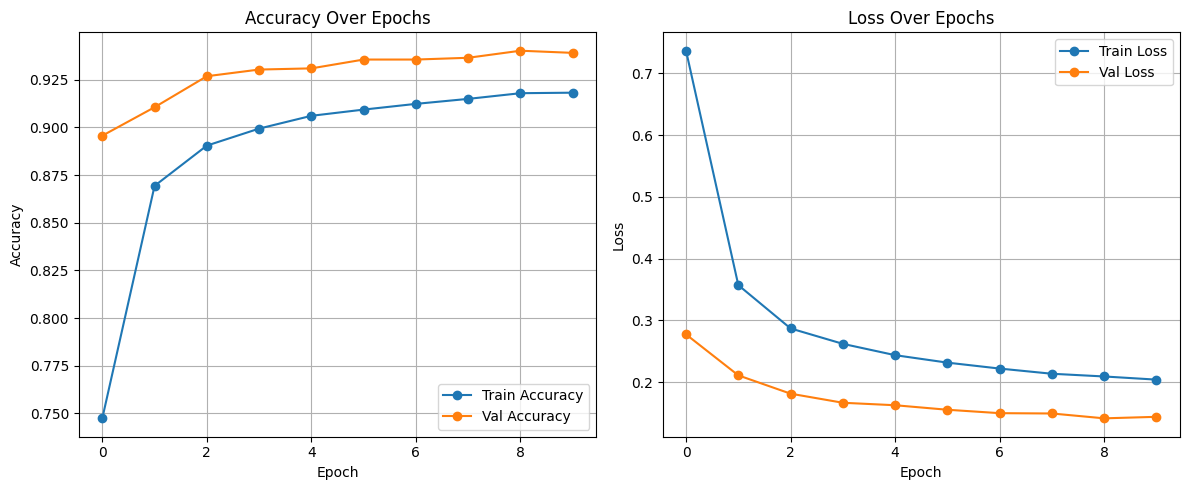


🔍 Test Metrics:
loss: 0.1451
compile_metrics: 0.9387
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

🧾 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       0.97      0.86      0.91       500
           5       0.99      0.99      0.99       500
           6       0.74      0.88      0.81       500
           7       0.95      1.00      0.97       500
           8       1.00      1.00      1.00       500
           9       0.63      0.68      0.65       500
          10       1.00      0.94      0.97       500
          11       1.00      0.98      0.99       500
          12       0.88      0.83      0.86       211
          13       0.98      1.00      0.99       500
          14       1.00      0.99      1.00       500
          15 

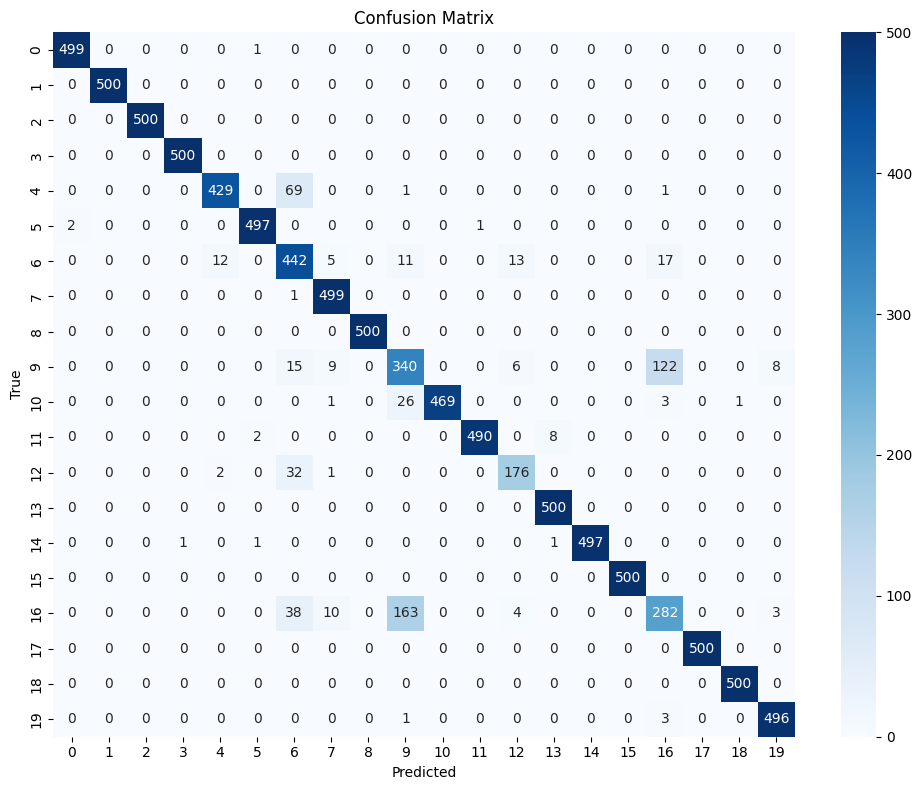

2435/2435 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


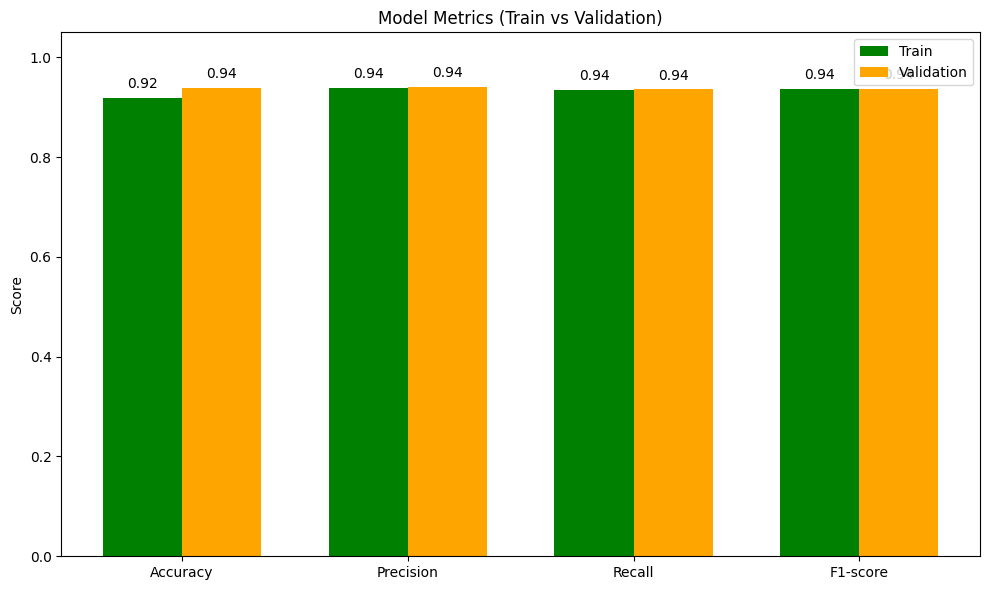

In [ ]:
# First import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the numpy files
uploaded = files.upload()  # Choose all 6 .npy files

# Print shapes to understand our data
print("Training shapes:", X_train.shape, y_train.shape)
print("Testing shapes:", X_test.shape, y_test.shape)
print("Validation shapes:", X_valid.shape, y_valid.shape)

# Step 2

# First, let's examine the data type and content
print("X_train data type:", type(X_train))
print("X_train first element:", X_train[0])

# Convert hex string data to numeric values
def hex_to_decimal(hex_string):
    # Split the string into pairs of hex values and convert each to decimal
    # Pad with zeros to ensure consistent length
    hex_values = hex_string.split()
    max_len = 64 # Replace with the desired or maximum length
    hex_values = hex_values + ['00'] * (max_len - len(hex_values)) #pad with '00'
    return np.array([int(x, 16) for x in hex_values])

# Convert the string data to numeric arrays
X_train_numeric = np.array([hex_to_decimal(x) for x in X_train])
X_test_numeric = np.array([hex_to_decimal(x) for x in X_test])
X_valid_numeric = np.array([hex_to_decimal(x) for x in X_valid])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes=num_classes)

# Define Average Augmentation Method
def average_augmentation(X, y, num_samples=200, pairs_per_sample=1):
    aug_X = []
    aug_y = []
    np.random.seed(42)
    indices = np.random.choice(len(X), size=num_samples, replace=False)
    for idx in indices:
        for _ in range(pairs_per_sample):
            j = np.random.choice(len(X))
            avg_sample = (X[idx] + X[j]) / 2
            aug_X.append(avg_sample)
            aug_y.append(y[idx])
    return np.array(aug_X), np.array(aug_y)

# Apply Average Augmentation
X_avg, y_avg = average_augmentation(X_train_scaled, y_train_cat)

# Merge Original + Augmented Data
X_all = np.vstack([X_train_scaled, X_avg])
y_all = np.vstack([y_train_cat, y_avg])

print("\nShapes after processing:")
print("X_train_numeric shape:", X_train_numeric.shape)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_avg shape:", X_avg.shape)
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)

#Step 3

# Let's examine the data type and content
print("X_train sample:", X_train[0])
print("y_train sample:", y_train[0])
print("\nX_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

#Step 4

# Convert hex string to numerical features
def hex_to_features(hex_string):
    # Split the string into pairs of hex characters and convert to integers
    hex_pairs = hex_string.split()
    # Pad with zeros to ensure consistent length
    max_len = 64 # Replace with the desired or maximum length
    hex_pairs = hex_pairs + ['00'] * (max_len - len(hex_pairs)) #pad with '00'
    return np.array([int(x, 16) for x in hex_pairs])

# Convert the data
X_train_numeric = np.array([hex_to_features(x) for x in X_train])
X_test_numeric = np.array([hex_to_features(x) for x in X_test])
X_valid_numeric = np.array([hex_to_features(x) for x in X_valid])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes)

print("After preprocessing:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("Number of classes:", num_classes)

#Step 5

# Let's check the length of hex strings to ensure they're consistent
lengths = [len(x.split()) for x in X_train]
print("Unique lengths in training data:", np.unique(lengths))
print("\nFirst sample split length:", len(X_train[0].split()))

#Step 6

# Convert hex strings to fixed-length features (pad or truncate to max_length)
def hex_to_fixed_features(hex_string, max_length=64):
    hex_pairs = hex_string.split()
    # Pad with zeros if shorter than max_length
    if len(hex_pairs) < max_length:
        hex_pairs.extend(['00'] * (max_length - len(hex_pairs)))
    # Truncate if longer than max_length
    hex_pairs = hex_pairs[:max_length]
    return np.array([int(x, 16) for x in hex_pairs])

# Convert the data with fixed length
X_train_numeric = np.array([hex_to_fixed_features(x) for x in X_train])
X_test_numeric = np.array([hex_to_fixed_features(x) for x in X_test])
X_valid_numeric = np.array([hex_to_fixed_features(x) for x in X_valid])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes)

print("After preprocessing:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("Number of classes:", num_classes)

# Define the model building function and train
def build_model(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
model = build_model(X_all.shape[1], y_all.shape[1])
history = model.fit(X_all, y_all, validation_data=(X_valid_scaled, y_valid_cat),
                   epochs=10, batch_size=32)

# Plot training history
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on test set
test_metrics = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print("\n🔍 Test Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print(f"{name}: {val:.4f}")

# Get predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Print classification report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Calculate and plot final metrics comparison
train_pred = model.predict(X_all)
train_pred_classes = np.argmax(train_pred, axis=1)
y_train_classes = np.argmax(y_all, axis=1)

val_pred = model.predict(X_valid_scaled)
val_pred_classes = np.argmax(val_pred, axis=1)
y_valid_classes = np.argmax(y_valid_cat, axis=1)

# Compute metrics
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_prec = precision_score(y_train_classes, train_pred_classes, average='macro')
val_prec = precision_score(y_valid_classes, val_pred_classes, average='macro')
train_rec = recall_score(y_train_classes, train_pred_classes, average='macro')
val_rec = recall_score(y_valid_classes, val_pred_classes, average='macro')
f1_train = f1_score(y_train_classes, train_pred_classes, average='macro')
f1_val = f1_score(y_valid_classes, val_pred_classes, average='macro')

# Plot metrics comparison
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_values = [train_acc, train_prec, train_rec, f1_train]
val_values = [val_acc, val_prec, val_rec, f1_val]

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, train_values, width, label='Train', color='green')
bars2 = plt.bar(x + width/2, val_values, width, label='Validation', color='orange')

plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title('Model Metrics (Train vs Validation)')
plt.xticks(x, metrics_names)
plt.legend()

# Add value annotations
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=05a66d2a217f3d135711c3999aeefbdf7ce9703f8fd41fc9821c3ba41bffc75b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=11f121501e450763f7673f28fb0936477292e605d11f1f150dfad206f7d274bb
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


LIME with Augumentation

In [3]:
!pip install lime
# Import required libraries
import numpy as np # This line is added
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import os

# Load the numpy files (adjust based on your environment)
from google.colab import files
uploaded = files.upload()  # Choose all .npy files

# Assuming the .npy files are uploaded successfully
X_train = np.load('x_payload_train.npy')
X_test = np.load('x_payload_test.npy')
X_valid = np.load('x_payload_valid.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
y_valid = np.load('y_valid.npy')

# Step 1: Check the shape and understand data
print("Training shapes:", X_train.shape, y_train.shape)
print("Testing shapes:", X_test.shape, y_test.shape)
print("Validation shapes:", X_valid.shape, y_valid.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c1ed9e2a6c4a1e91af730093b7c6c89dcdfb7aa74dcbccd6cfc4597f84caff75
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Saving x_payload_test.npy to x_payload_test.npy
Saving x_payload_train.npy to x_payload_train.npy
Saving x_payload_valid.npy to x_payload_valid.npy
Saving y_test.npy to y_test.npy
Saving y_train.npy to y_train.npy
Saving y_valid.npy to y_valid.npy
Training shapes: (77692,) (77692,)
Testing shapes: (9711,) (9711,)
Validation shapes: (9712,) (9712,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 95s 36ms/step - accuracy: 0.5813 - loss: 1.2629 - val_accuracy: 0.8796 - val_loss: 0.3237
Epoch 2/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 145s 38ms/step - accuracy: 0.8874 - loss: 0.2950 - val_accuracy: 0.8986 - val_loss: 0.2485
Epoch 3/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.9088 - loss: 0.2321 - val_accuracy: 0.9292 - val_loss: 0.1671
Epoch 4/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 143s 36ms/step - accuracy: 0.9245 - loss: 0.1876 - val_accuracy: 0.9329 - val_loss: 0.1655
Epoch 5/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 140s 36ms/step - accuracy: 0.9353 - loss: 0.1569 - val_accuracy: 0.9382 - val_loss: 0.1525
Epoch 6/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 89s 37ms/step - accuracy: 0.9449 - loss: 0.1307 - val_accuracy: 0.9480 - val_loss: 0.1242
Epoch 7/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 92s 38ms/step - accuracy: 0.9481 - loss: 0.1232 - val_accuracy: 0.9463 - val_loss: 0.1204
Epoch 8/10
2428/2428 ━━━━━━━━━━━━━━━━━━━━ 142s 38ms/step - accuracy: 0.95

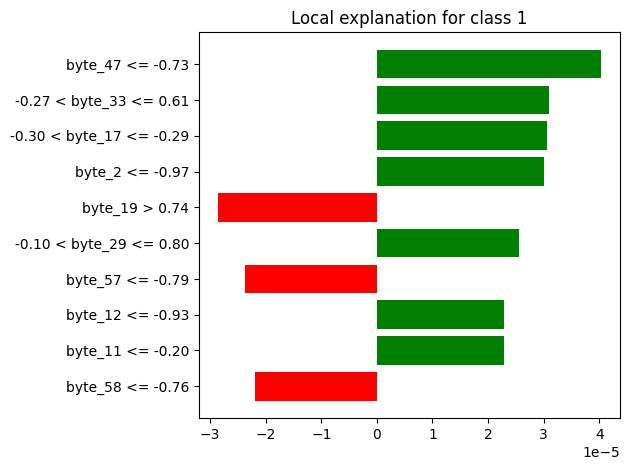

In [5]:
# Step 2: Convert Hexadecimal to Numeric Values
def hex_to_decimal(hex_string, max_len=64): # Added max_len
    """Convert a hex string to a list of integers."""
    hex_values = hex_string.split()
    hex_values = hex_values + ['00'] * (max_len - len(hex_values))  # Pad with zeros to max_len
    return np.array([int(x, 16) for x in hex_values])

# Convert the data from hex strings to numeric arrays
X_train_numeric = np.array([hex_to_decimal(x) for x in X_train])
X_test_numeric = np.array([hex_to_decimal(x) for x in X_test])
X_valid_numeric = np.array([hex_to_decimal(x) for x in X_valid])

# Step 3: Preprocessing and Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
X_valid_scaled = scaler.transform(X_valid_numeric)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_valid_cat = tf.keras.utils.to_categorical(y_valid, num_classes=num_classes)

# Step 4: Building the CNN-LSTM Model
def build_cnn_lstm_model(input_shape, num_classes):
    model = models.Sequential()

    # CNN Layer
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # LSTM Layer
    model.add(layers.LSTM(128, return_sequences=False))

    # Dense Layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data to 3D (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
X_valid_reshaped = X_valid_scaled.reshape((X_valid_scaled.shape[0], X_valid_scaled.shape[1], 1))

# Step 5: Train the CNN-LSTM model
model = build_cnn_lstm_model(X_train_reshaped.shape[1:], y_train_cat.shape[1])
history = model.fit(X_train_reshaped, y_train_cat, validation_data=(X_valid_reshaped, y_valid_cat),
                    epochs=10, batch_size=32)

# Step 6: Evaluate the model
test_metrics = model.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print("\nTest Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print(f"{name}: {val:.4f}")

# Step 7: LIME Explainability
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,  # Use the original data for explanation
    feature_names=[f"byte_{i}" for i in range(X_train_scaled.shape[1])],  # Feature names (byte_0, byte_1, etc.)
    class_names=[str(i) for i in range(num_classes)],  # Class names (0, 1, 2, etc.)
    mode='classification'  # Since we're doing classification
)

# Pick a sample from the test set (e.g., index 0)
sample_id = 0
sample_instance = X_test_scaled[sample_id]
sample_true_label = np.argmax(y_test_cat[sample_id])

# Explain the prediction
exp = explainer.explain_instance(sample_instance, model.predict, num_features=10)

# Display the true label
print(f"True label for the sample: {sample_true_label}")

# Show the explanation in notebook (table of features and their importance)
exp.show_in_notebook(show_table=True)

# Save the explanation as an HTML file (optional)
os.makedirs('/mnt/data', exist_ok=True)
exp.save_to_file("/mnt/data/lime_explanation_sample0.html")

# Optional: Save the explanation as a plot for inspection
exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

CNN Method

In [ ]:
!pip install shap

In [ ]:
!pip install xgboost

SHAP Method with Augumentation


📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500
           9       0.90      0.89      0.90       500
          10       1.00      0.99      0.99       500
          11       1.00      1.00      1.00       500
          12       1.00      1.00      1.00       211
          13       1.00      1.00      1.00       500
          14       1.00      1.00      1.00       500
          15       1.00      1.00      1.00       500
          16       0.89      0.91      0.90       500
 

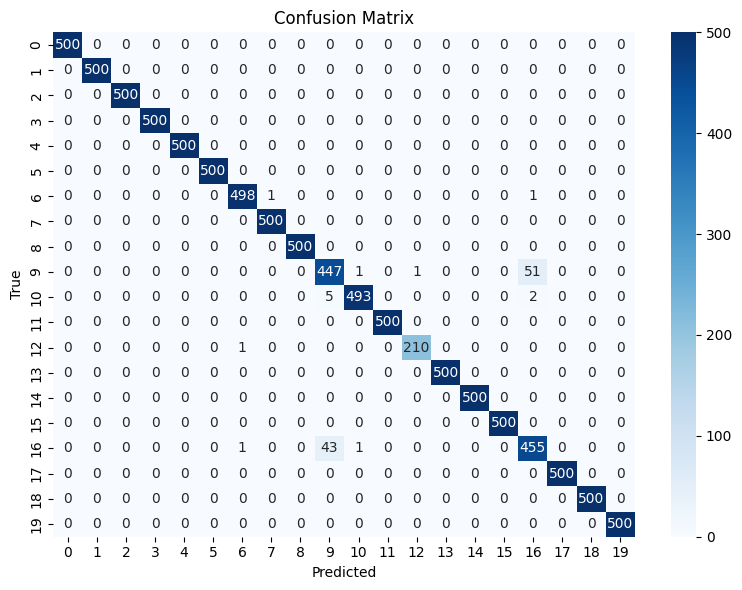

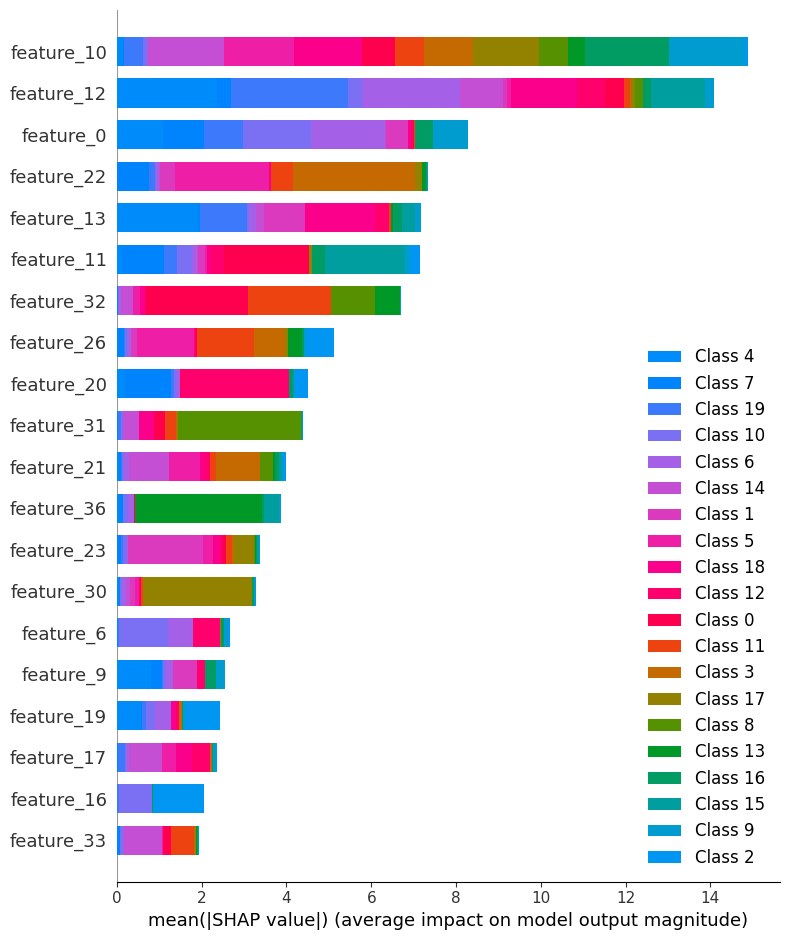

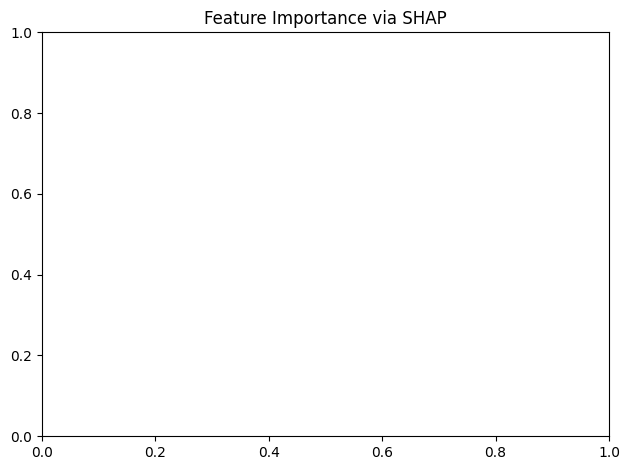

In [ ]:
# ✅ STEP 1: Imports
import numpy as np
import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# ✅ STEP 2: Load the Data
X_train = np.load('x_payload_train.npy') # Load X_train data
X_test = np.load('x_payload_test.npy')  # Load X_test data
y_train = np.load('y_train.npy')  # Load y_train data
y_test = np.load('y_test.npy')  # Load y_test data


# ✅ STEP 3: Preprocessing Hex Strings
def process_hex_blocks(hex_string, max_length=64):
    hex_pairs = hex_string.split()
    hex_pairs += ['00'] * (max_length - len(hex_pairs))  # Pad if shorter
    hex_pairs = hex_pairs[:max_length]  # Truncate if longer
    return np.array([int(x, 16) for x in hex_pairs])

# Apply to dataset
X_train_blocks = np.array([process_hex_blocks(x) for x in X_train])
X_test_blocks = np.array([process_hex_blocks(x) for x in X_test])

# Create DataFrame with feature names
feature_names = [f'feature_{i}' for i in range(64)]
X_train_df = pd.DataFrame(X_train_blocks, columns=feature_names)
X_test_df = pd.DataFrame(X_test_blocks, columns=feature_names)

# ✅ STEP 4: Encode Labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# ✅ STEP 5: Train XGBoost Model
model = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train_df, y_train_enc)

# ✅ STEP 6: Evaluate Model
y_pred = model.predict(X_test_df)
print("\n📋 Classification Report:")
print(classification_report(y_test_enc, y_pred))

# ✅ STEP 7: Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ✅ STEP 8: SHAP Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_df)

# ✅ STEP 9: SHAP Summary Bar Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_df, plot_type="bar", max_display=20) # Removed the conditional indexing of shap_values
plt.title("Feature Importance via SHAP")
plt.tight_layout()
plt.show()

# ✅ STEP 10: SHAP Dependence Plot (Top Feature)
# Calculate mean importance across all classes for each feature
# Reshape shap_values to (num_samples, num_features)
shap_values_reshaped = shap_values.reshape(shap_values.shape[0], -1)
importance = np.abs(shap_values_reshaped).mean(axis=0)
# Reshape importance back to (num_features, num_classes) to find top feature
importance = importance.reshape(shap_values.shape[1], shap_values.shape[2])
# Calculate mean importance across all classes
importance = importance.mean(axis=1)
top_idx = np.argmax(importance)
top_feature = feature_names[top_idx]

# # Plot the dependence plot for the top feature
# plt.figure(figsize=(12, 8))
# shap.summary_plot(shap_values, X_test_df, plot_type="bar", max_display=20)
# plt.title("Feature Importance via SHAP Analysis")
# plt.tight_layout()
# plt.show()